# Some preparing

In [23]:
import pandas as pd
import numpy as np 

In [24]:
df = pd.read_csv('./jobs.csv')

In [25]:
df_second = pd.read_csv('./jobs_old.csv')

df = pd.concat([df, df_second], ignore_index=True)

In [26]:
df.head()

,title,money,knoladge,company,addition,city,link
0,Продавец-консультант остров часовых изделий ТЦ...,По договорённости,NaN,AllTime,['Опыт не нужен'],Челябинск,https://russia.superjob.ru/vacancy/search/?pag...
1,Охранник,351.0,NaN,ГК БРУ,"['Опыт не нужен', 'Сменный график']",Тамбов,https://russia.superjob.ru/vacancy/search/?pag...
2,Техник отдела испытаний,55.0,NaN,Московский завод ФИЗПРИБОР,['Полная занятость'],Подольск,https://russia.superjob.ru/vacancy/search/?pag...
3,Фармацевт / провизор (м. Отрадное),115.0,NaN,Ригла7.6,"['Опыт не нужен', 'Сменный график']","Москва, Каргопольская улица, 11к1",https://russia.superjob.ru/vacancy/search/?pag...
4,Монтер пути 3 разряда,130.25,NaN,"СПб ГУП ""Горэлектротранс""6.9","['Отклик без резюме', 'Опыт не нужен', 'Полная...",Санкт-Петербург,https://russia.superjob.ru/vacancy/search/?pag...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2141 non-null   object
 1   money     2084 non-null   object
 2   knoladge  425 non-null    object
 3   company   2122 non-null   object
 4   addition  1939 non-null   object
 5   city      2120 non-null   object
 6   link      2141 non-null   object
dtypes: object(7)
memory usage: 117.2+ KB


In [28]:
df.columns

Index(['title', 'money', 'knoladge', 'company', 'addition', 'city', 'link'], dtype='object')

In [29]:
df['money'] = df['money'].replace('По договорённости', 0)
df['money'] = pd.to_numeric(df['money'], errors='coerce').fillna(0)
df['money'] = df['money'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2141 non-null   object
 1   money     2141 non-null   int64 
 2   knoladge  425 non-null    object
 3   company   2122 non-null   object
 4   addition  1939 non-null   object
 5   city      2120 non-null   object
 6   link      2141 non-null   object
dtypes: int64(1), object(6)
memory usage: 117.2+ KB


In [31]:
import pandas as pd
import re

# Assuming df is your DataFrame with columns ['title', 'money', 'knoladge', 'company', 'addition', 'city', 'link']

# Function to clean text: convert to uppercase and keep only letters
def clean_text(text):
    if isinstance(text, str):  # Ensure the input is a string
        # Convert to uppercase and remove non-letter characters
        cleaned = re.sub(r'[^A-Za-zА-Яа-я\s]', '', text.upper())
        # Remove extra spaces
        return ' '.join(cleaned.split())
    return text  # Return unchanged if not a string (e.g., NaN)

# Apply cleaning to 'title' and 'knoladge' columns
df['title'] = df['title'].apply(clean_text)
df['knoladge'] = df['knoladge'].apply(clean_text)

# Get unique words from 'title'
title_words = set()
df['title'].dropna().str.split().apply(title_words.update)
# Get unique words from 'knoladge'
knoladge_words = set()
df['knoladge'].dropna().str.split().apply(knoladge_words.update)

# Print the number of unique words
print(f"Number of unique words in 'title': {len(title_words)}")
print(f"Number of unique words in 'knoladge': {len(knoladge_words)}")
print(f"Total unique words (title + knoladge): {len(title_words.union(knoladge_words))}")

Number of unique words in 'title': 2057
Number of unique words in 'knoladge': 445
Total unique words (title + knoladge): 2464


In [32]:
df.knoladge

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
2136                          NET HTML JAVASCRIPT ASP NET
2137    GEMS DEVELOPMENT NPM YARN NUGET JAVASCRIPT ANG...
2138    ANGULAR JS TYPESCRIPT POSTGRESQL SEQUELIZE EXP...
2139    WINDOWS SERVER CENTOS POSTRESQL NODE JS NGINX ...
2140    WINDOWS SERVER CENTOS POSTRESQL NODE JS NGINX ...
Name: knoladge, Length: 2141, dtype: object

In [33]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool

# Assuming df is your DataFrame with columns ['title', 'money', 'knoladge', 'company', 'addition', 'city', 'link']
# and 'title' and 'knoladge' are already cleaned (uppercase, letters only)

# Drop the 'link' column
df = df.drop(columns=['link'])

# Handle missing values
for col in ['title', 'knoladge', 'company', 'addition', 'city']:
    df[col] = df[col].fillna('UNKNOWN')

# Get unique words in 'title'
title_words = list(set(' '.join(df['title'].dropna()).split()))

# Get unique words in 'knoladge'
knoladge_words = list(set(' '.join(df['knoladge'].dropna()).split()))

# Create binary columns for 'title' efficiently
title_binary = pd.DataFrame({
    f'title_{word}': df['title'].apply(lambda x: 1 if isinstance(x, str) and word in x.split() else 0)
    for word in title_words
})

# Create binary columns for 'knoladge' efficiently
knoladge_binary = pd.DataFrame({
    f'knoladge_{word}': df['knoladge'].apply(lambda x: 1 if isinstance(x, str) and word in x.split() else 0)
    for word in knoladge_words
})

# Combine all columns
df = pd.concat([df.drop(columns=['title', 'knoladge']), title_binary, knoladge_binary], axis=1)

# Define features and target
X = df.drop(columns=['money'])
y = df['money']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features
categorical_features = ['company', 'addition', 'city'] + [f'title_{word}' for word in title_words] + [f'knoladge_{word}' for word in knoladge_words]

# Create CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'verbose': 0  # Suppress output
    }
    
    # Train CatBoost model
    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=100)
    
    # Return test RMSE
    return model.get_best_score()['validation']['RMSE']

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

# Print best parameters and RMSE
print("Best parameters:", study.best_params)
print("Best test RMSE:", study.best_value)

# Train final model with best parameters
best_params = study.best_params
model = CatBoostRegressor(**best_params, random_seed=42, verbose=100)
model.fit(train_pool, eval_set=test_pool)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.get_feature_importance()
}).sort_values(by='importance', ascending=False)
print(feature_importance) 

[I 2025-10-19 22:27:35,359] A new study created in memory with name: no-name-45fbd3cd-3e56-4f57-a5bb-4d8f0560cb3f
[I 2025-10-19 22:29:03,513] Trial 0 finished with value: 96.73840859624275 and parameters: {'iterations': 1386, 'learning_rate': 0.08032641441959369, 'depth': 10, 'l2_leaf_reg': 6.952739125375818}. Best is trial 0 with value: 96.73840859624275.
[I 2025-10-19 22:29:32,246] Trial 1 finished with value: 97.34995562768403 and parameters: {'iterations': 1017, 'learning_rate': 0.14315764889883031, 'depth': 9, 'l2_leaf_reg': 6.16728329632581}. Best is trial 0 with value: 96.73840859624275.
[I 2025-10-19 22:29:51,289] Trial 2 finished with value: 98.31344296138582 and parameters: {'iterations': 1787, 'learning_rate': 0.060080137688192876, 'depth': 5, 'l2_leaf_reg': 1.510356234511605}. Best is trial 0 with value: 96.73840859624275.
[I 2025-10-19 22:30:23,040] Trial 3 finished with value: 98.61065128979062 and parameters: {'iterations': 1330, 'learning_rate': 0.015244452949418152, 'd

Best parameters: {'iterations': 1851, 'learning_rate': 0.028136304488804647, 'depth': 10, 'l2_leaf_reg': 9.026309576029325}
Best test RMSE: 96.11750303202905
0:	learn: 106.8089604	test: 108.0609056	best: 108.0609056 (0)	total: 95.1ms	remaining: 2m 56s
100:	learn: 98.9181718	test: 101.3143767	best: 101.3069333 (98)	total: 7.73s	remaining: 2m 13s
200:	learn: 95.7383452	test: 99.9319418	best: 99.9319418 (200)	total: 15.4s	remaining: 2m 6s
300:	learn: 93.9616001	test: 99.3643050	best: 99.3635511 (299)	total: 22.7s	remaining: 1m 57s
400:	learn: 90.4683988	test: 98.2465922	best: 98.2447853 (399)	total: 32s	remaining: 1m 55s
500:	learn: 87.5334917	test: 97.5779144	best: 97.5779144 (500)	total: 41.4s	remaining: 1m 51s
600:	learn: 85.2594782	test: 97.1979386	best: 97.1970767 (598)	total: 50.6s	remaining: 1m 45s
700:	learn: 83.3890244	test: 97.0299271	best: 97.0149541 (692)	total: 1m	remaining: 1m 38s
800:	learn: 81.7933220	test: 96.8665642	best: 96.8665642 (800)	total: 1m 9s	remaining: 1m 31s
9

In [38]:
import numpy as np

# Calculate MAPE on test set
y_pred = model.predict(X_test)
mask = y_test != 0  # Exclude zeros
y_test_nonzero = y_test[mask]
y_pred_nonzero = y_pred[mask]
mape = 100 * np.mean(np.abs((y_test_nonzero - y_pred_nonzero) / y_test_nonzero))
print(f"Test MAPE: {mape:.2f}%")

Test MAPE: 90.30%


In [34]:
len(df[df.money > 0]), len(df)

(1878, 2141)

In [35]:
print ('companies count:', df.company.unique().shape) # it is too much
print ('city count:', df.city.unique().shape) # it is perfect

companies count: (383,)
city count: (560,)


In [36]:
df[df.money > 0].isnull().sum()

money                 0
company               0
addition              0
city                  0
title_КОЧУБЕЕВСКОЕ    0
                     ..
knoladge_RKEEPER      0
knoladge_CHAPMAN      0
knoladge_BI           0
knoladge_EXT          0
knoladge_ACX          0
Length: 2507, dtype: int64

# Work begins here

In [37]:
for_work = df.drop(['company', 'link', 'title'], axis=1)

KeyError: "['link', 'title'] not found in axis"

In [ ]:
for_work

,money,knoladge,addition,city
0,200.0,AIOHTTP STARLETTE FASTAPI FASTAPI PYTHON LINUX...,['Удаленная работа'],Москва
1,NaN,PYTHON DJANGO,NaN,Москва
2,180.0,PYTHON DRF FASTAPI CELERY,['Удаленная работа'],Москва
3,NaN,LINUX CENTOS OPENSUSE,['Доступно студентам'],Москва
4,18.0,NaN,['Доступно студентам'],Домодедово
...,...,...,...,...
136,NaN,NET HTML JAVASCRIPT ASP NET,['Удаленная работа'],Москва
137,NaN,GEMS DEVELOPMENT NPM YARN NUGET JAVASCRIPT ANG...,NaN,Омск
138,NaN,ANGULAR JS TYPESCRIPT POSTGRESQL SEQUELIZE EXP...,['Удаленная работа'],Москва
139,40.0,WINDOWS SERVER CENTOS POSTRESQL NODE JS NGINX ...,NaN,Сыктывкар


In [ ]:
will_use = pd.get_dummies(for_work)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test = will_use[will_use.money < 1]
X_train, X_test, y_train, y_test = train_test_split(will_use[will_use.money > 0].drop(['money'], axis=1), will_use[will_use.money > 0].money, test_size=0.3, random_state=17)

## Make a model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

1498.2992861087125

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
will_use = will_use.drop(feature_imp[feature_imp == 0].index, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(will_use[will_use.money > 0].drop(['money'], axis=1), will_use[will_use.money > 0].money, test_size=0.3, random_state=17)

In [ ]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

1509.0375681830847

In [ ]:
for_work.head(5)

,money,knoladge,addition,city
0,200.0,AIOHTTP STARLETTE FASTAPI FASTAPI PYTHON LINUX...,['Удаленная работа'],Москва
1,NaN,PYTHON DJANGO,NaN,Москва
2,180.0,PYTHON DRF FASTAPI CELERY,['Удаленная работа'],Москва
3,NaN,LINUX CENTOS OPENSUSE,['Доступно студентам'],Москва
4,18.0,NaN,['Доступно студентам'],Домодедово


In [ ]:
model.predict(will_use.drop('money', axis=1).head(5))

array([181.958 , 110.791 , 170.508 , 122.902 ,  27.8065])

In [ ]:
will_use.money.describe()

count     84.000000
mean      88.750000
std       60.097887
min       15.000000
25%       40.000000
50%       75.000000
75%      120.000000
max      280.000000
Name: money, dtype: float64

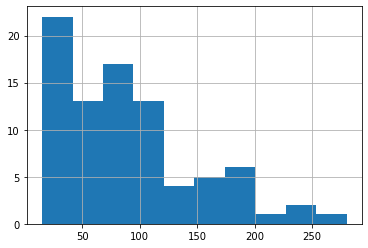

In [ ]:
will_use.money.hist();

# Save a model

In [ ]:
import joblib

In [ ]:
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.3836807735718242
